In [1]:
import torch

In [2]:
!pip install networkx==3.1

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [4]:
!pip install scikit-learn

In [5]:
%%capture

# the environment we will be working with and its dependencies
!pip install gymnasium
!pip install nrel-pysam
!pip install simplejson
# TODO: update to install stable version from PyPi
!pip install CityLearn

# to generate static figures
!pip install matplotlib
!pip install seaborn

# provide standard RL algorithms
!pip install --no-deps stable-baselines3

# results submission
!pip install requests
!pip install beautifulsoup4

# progress bar
!pip install tqdm

In [6]:
%pip install jupyter notebook

Note: you may need to restart the kernel to use updated packages.


In [45]:
# system operations
import inspect
import os
import uuid
import warnings
from typing import List, Tuple

# date and time
import datetime

# type hinting
from typing import Any

# User interaction
from ipywidgets import Button, HTML
from ipywidgets import Text, HBox, VBox

# data visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tqdm import tqdm

# data manipulation
from bs4 import BeautifulSoup
import math
import numpy as np
import pandas as pd
import random
import re
import requests
import simplejson as json

# cityLearn
from citylearn.agents.base import (
    BaselineAgent,
    Agent as RandomAgent
)
from citylearn.agents.rbc import HourRBC
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import (
    NormalizedObservationWrapper,
    StableBaselines3Wrapper,
    TabularQLearningWrapper
)

# RL algorithms
from stable_baselines3 import SAC

### Set notebook settings

In [46]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline



In [47]:
display('All CityLearn datasets:', sorted(DataSet.get_names()))


'All CityLearn datasets:'

['baeda_3dem',
 'ca_alameda_county_neighborhood',
 'citylearn_challenge_2020_climate_zone_1',
 'citylearn_challenge_2020_climate_zone_2',
 'citylearn_challenge_2020_climate_zone_3',
 'citylearn_challenge_2020_climate_zone_4',
 'citylearn_challenge_2021',
 'citylearn_challenge_2022_phase_1',
 'citylearn_challenge_2022_phase_2',
 'citylearn_challenge_2022_phase_3',
 'citylearn_challenge_2022_phase_all',
 'citylearn_challenge_2023_phase_1',
 'citylearn_challenge_2023_phase_2_local_evaluation',
 'citylearn_challenge_2023_phase_2_online_evaluation_1',
 'citylearn_challenge_2023_phase_2_online_evaluation_2',
 'citylearn_challenge_2023_phase_2_online_evaluation_3',
 'citylearn_challenge_2023_phase_3_1',
 'citylearn_challenge_2023_phase_3_2',
 'citylearn_challenge_2023_phase_3_3',
 'tx_travis_county_neighborhood',
 'vt_chittenden_county_neighborhood']

In [48]:
DATASET_NAME = 'citylearn_challenge_2023_phase_1'
schema = DataSet.get_schema(DATASET_NAME)
root_directory = schema['root_directory']
schema

{'random_seed': 2023,
 'root_directory': '/home/wepea2/.local/lib/python3.8/site-packages/citylearn/data/datasets/citylearn_challenge_2023_phase_1',
 'central_agent': True,
 'simulation_start_time_step': 0,
 'simulation_end_time_step': 719,
 'episode_time_steps': None,
 'rolling_episode_split': False,
 'random_episode_split': False,
 'seconds_per_time_step': 3600.0,
 'observations': {'month': {'active': False, 'shared_in_central_agent': True},
  'day_type': {'active': True, 'shared_in_central_agent': True},
  'hour': {'active': True, 'shared_in_central_agent': True},
  'daylight_savings_status': {'active': False,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_6h': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_12h': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_24h': {'a

In [49]:
''' Choose dataset '''

DATASET_NAME = 'citylearn_challenge_2022_phase_all'
schema = DataSet.get_schema(DATASET_NAME)
root_directory = schema['root_directory']
schema

In [50]:
selected_building = "Building_1"


In [51]:
'''View PRICING data'''
# change the suffix number in the next code line to a
# number between 1 and 17 to preview other buildings

filename = schema['buildings'][selected_building]['pricing']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head(20))
# building_data.info()

,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h
0,0.02893,0.02893,0.02915,0.02893
1,0.02893,0.02915,0.02915,0.02893
2,0.02893,0.02915,0.02915,0.02893
3,0.02893,0.02915,0.05867,0.02893
4,0.02893,0.02915,0.05867,0.02893
5,0.02893,0.02915,0.05867,0.02893
6,0.02893,0.02915,0.02915,0.02893
7,0.02915,0.02915,0.02915,0.02893
8,0.02915,0.02915,0.02915,0.02893
9,0.02915,0.05867,0.02915,0.02893


In [52]:
'''View weather data'''
filename = schema['buildings'][selected_building]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
display(weather_data.head(10))
# building_data.info()

,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
0,24.66,77.56,0.00,0.00,24.910639,38.415960,27.611464,72.980270,41.822360,83.230995,54.625927,116.842890,0.000000,143.32434,1020.75610,0.00000
1,24.07,85.12,0.00,0.00,27.076563,38.319350,23.515500,87.317660,37.910023,95.353950,78.375480,89.220505,0.000000,300.36105,825.09730,0.00000
2,23.90,89.62,0.00,0.00,29.351833,39.150482,23.659443,60.341454,30.190199,66.266410,259.822140,82.855934,0.000000,196.69113,987.90930,0.00000
3,23.87,91.88,0.00,0.00,31.032974,40.934788,26.686003,50.063927,31.519740,94.456370,248.631530,105.130120,0.000000,465.48320,854.33185,0.00000
4,23.83,93.06,0.00,0.00,33.814470,39.717842,24.467758,40.942577,33.119545,100.000000,272.825160,75.627980,0.000000,569.20330,941.24335,0.00000
5,23.85,93.25,0.00,0.00,36.442673,38.721996,25.222326,44.298462,31.612091,100.000000,132.196500,65.864170,0.000000,911.75010,468.38348,0.00000
6,24.98,86.19,56.19,140.63,36.919560,34.716496,24.522085,39.487850,30.496082,73.839510,133.818790,41.657166,63.052147,703.67645,234.78137,185.17834
7,26.94,74.56,90.91,268.13,38.978542,33.505670,27.364582,28.588518,56.134216,63.504540,96.567314,0.000000,189.493790,916.12680,0.00000,401.81763
8,29.30,62.75,218.81,197.38,39.550983,29.976658,30.812954,23.190601,36.918400,65.210760,122.018210,0.000000,147.057280,998.78610,0.00000,624.64310
9,31.66,52.56,278.20,405.23,39.498924,28.918430,33.260220,27.604939,67.003030,29.821941,128.235720,0.000000,148.782850,834.03296,0.00000,844.46810


In [53]:
## View miscellaneous info on weather data
outdoor_temp = weather_data["outdoor_dry_bulb_temperature"].describe()
outdoor_temp


count    720.000000
mean      29.588125
std        4.787630
min       21.380000
25%       25.327500
50%       28.480000
75%       34.092500
max       40.320000
Name: outdoor_dry_bulb_temperature, dtype: float64

In [54]:
'''View energy simulation data'''
import random

filename = schema['buildings'][selected_building]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head(10))

#Modify data to be more relevant
building_data.loc[:, 'indoor_dry_bulb_temperature_set_point'] = 25
building_data.loc[:, 'hvac_mode'] = 3

for index, value in building_data["heating_demand"] .items():
    building_data.at[index, 'heating_demand'] = random.random()

for index, value in building_data["indoor_dry_bulb_temperature"] .items():
    building_data.at[index, 'indoor_dry_bulb_temperature'] = random.uniform(22, 28)




display(building_data.head(10))

building_data.info()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,23.098652,-0.123570,61.086185,0.356839,0.055682,1.119216,0.0,0.000000,3.0,23.222221,1
1,6,2,5,0,22.234743,0.012520,64.361380,0.345078,0.159338,1.469638,0.0,0.000000,3.0,22.222221,1
2,6,3,5,0,22.223060,0.000838,64.493416,0.338769,0.057004,1.458372,0.0,0.000000,3.0,22.222221,1
3,6,4,5,0,22.222250,0.000029,64.769700,0.334856,0.000000,1.337342,0.0,0.000000,3.0,22.222221,1
4,6,5,5,0,22.222237,0.000014,65.152120,0.348607,0.000000,1.163453,0.0,0.000000,3.0,22.222221,1
5,6,6,5,0,22.222237,0.000015,65.871284,0.346894,0.334834,1.335715,0.0,0.000000,3.0,22.222221,1
6,6,7,5,0,22.222230,0.000009,66.065575,0.408589,0.905819,1.238941,0.0,25.331348,2.0,22.222221,1
7,6,8,5,0,22.332556,-0.000778,65.945410,0.402513,0.000000,1.319662,0.0,91.302536,2.0,22.333334,1
8,6,9,5,0,22.771797,-0.005980,64.098340,0.452810,3.315016,4.025016,0.0,221.975020,2.0,22.777779,1
9,6,10,5,0,23.266788,-0.066545,62.219505,0.400676,0.215396,2.458844,0.0,401.644070,1.0,23.333334,1


,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,24.378969,-0.123570,61.086185,0.356839,0.055682,1.119216,0.799115,0.000000,3.0,25.0,3
1,6,2,5,0,25.566538,0.012520,64.361380,0.345078,0.159338,1.469638,0.325906,0.000000,3.0,25.0,3
2,6,3,5,0,27.583345,0.000838,64.493416,0.338769,0.057004,1.458372,0.240494,0.000000,3.0,25.0,3
3,6,4,5,0,25.377686,0.000029,64.769700,0.334856,0.000000,1.337342,0.822556,0.000000,3.0,25.0,3
4,6,5,5,0,25.143881,0.000014,65.152120,0.348607,0.000000,1.163453,0.115063,0.000000,3.0,25.0,3
5,6,6,5,0,22.525771,0.000015,65.871284,0.346894,0.334834,1.335715,0.476237,0.000000,3.0,25.0,3
6,6,7,5,0,22.984303,0.000009,66.065575,0.408589,0.905819,1.238941,0.557895,25.331348,2.0,25.0,3
7,6,8,5,0,23.074015,-0.000778,65.945410,0.402513,0.000000,1.319662,0.611333,91.302536,2.0,25.0,3
8,6,9,5,0,27.134569,-0.005980,64.098340,0.452810,3.315016,4.025016,0.145471,221.975020,2.0,25.0,3
9,6,10,5,0,22.115184,-0.066545,62.219505,0.400676,0.215396,2.458844,0.630651,401.644070,1.0,25.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      720 non-null    int64  
 1   hour                                       720 non-null    int64  
 2   day_type                                   720 non-null    int64  
 3   daylight_savings_status                    720 non-null    int64  
 4   indoor_dry_bulb_temperature                720 non-null    float64
 5   average_unmet_cooling_setpoint_difference  720 non-null    float64
 6   indoor_relative_humidity                   720 non-null    float64
 7   non_shiftable_load                         720 non-null    float64
 8   dhw_demand                                 720 non-null    float64
 9   cooling_demand                             720 non-null    float64
 10  heating_demand            

In [55]:
indoor_temp = building_data["indoor_dry_bulb_temperature"].describe()
indoor_temp


count    720.000000
mean      24.972828
std        1.720788
min       22.005747
25%       23.509612
50%       25.003122
75%       26.396950
max       27.996509
Name: indoor_dry_bulb_temperature, dtype: float64

In [56]:
## View info on simulation
indoor_temp_desired = building_data["indoor_dry_bulb_temperature_set_point"].describe()
indoor_temp_desired


count    720.0
mean      25.0
std        0.0
min       25.0
25%       25.0
50%       25.0
75%       25.0
max       25.0
Name: indoor_dry_bulb_temperature_set_point, dtype: float64

In [57]:
occupant_info = building_data["occupant_count"].describe()
occupant_info

count    720.000000
mean       2.268056
std        0.838292
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: occupant_count, dtype: float64

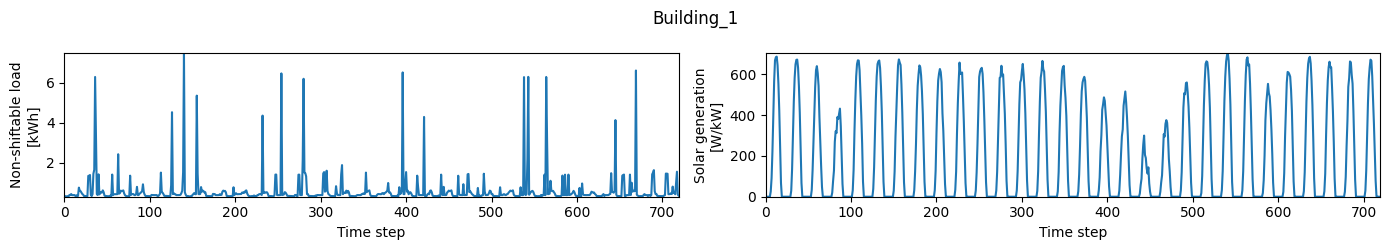

In [58]:
'''Plot non-shiftable load vs solar generation'''

fig, axs = plt.subplots(1, 2, figsize=(14, 2.5))
x = building_data.index
y1 = building_data['non_shiftable_load']
y2 = building_data['solar_generation']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Non-shiftable load\n[kWh]')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar generation\n[W/kW]')
fig.suptitle(selected_building)
plt.tight_layout()
plt.show()

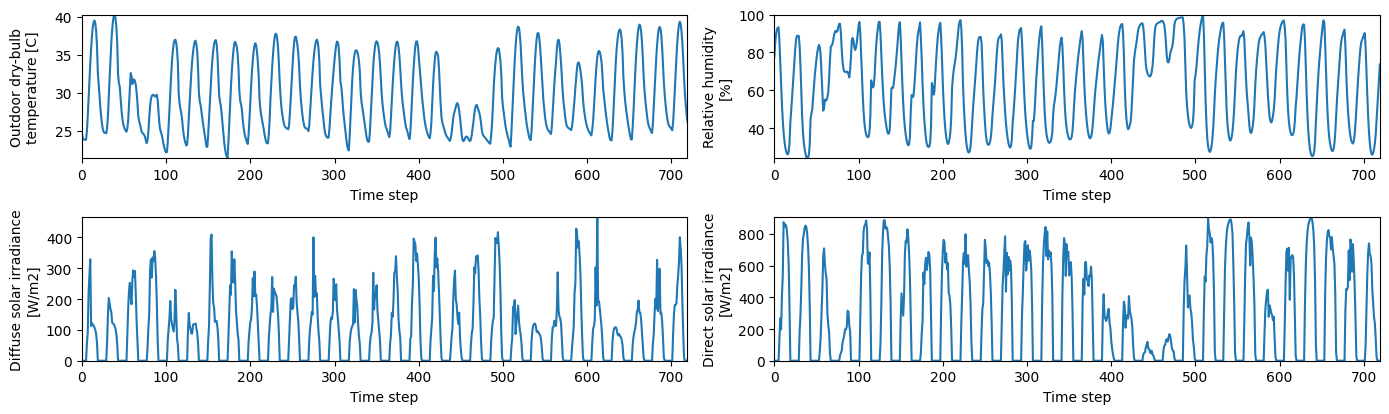

In [59]:
'''Plot weather data'''
columns = [
    'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity',
    'diffuse_solar_irradiance', 'direct_solar_irradiance'
]
titles = [
    'Outdoor dry-bulb\ntemperature [C]', 'Relative humidity\n[%]',
    'Diffuse solar irradiance\n[W/m2]', 'Direct solar irradiance\n[W/m2]'
]
fig, axs = plt.subplots(2, 2, figsize=(14, 4.25))
x = weather_data.index

for ax, c, t in zip(fig.axes, columns, titles):
    y = weather_data[c]
    ax.plot(x, y)
    ax.set_xlabel('Time step')
    ax.set_ylabel(t)

fig.align_ylabels()
plt.tight_layout()
plt.show()

In [60]:
'''View carbon intensity data'''
filename = schema['buildings'][selected_building]['carbon_intensity']
filepath = os.path.join(root_directory, filename)
carbon_intensity_data = pd.read_csv(filepath)
display(carbon_intensity_data.head())
# carbon_intensity_data.info()

,carbon_intensity
0,0.402488
1,0.382625
2,0.369458
3,0.367017
4,0.374040


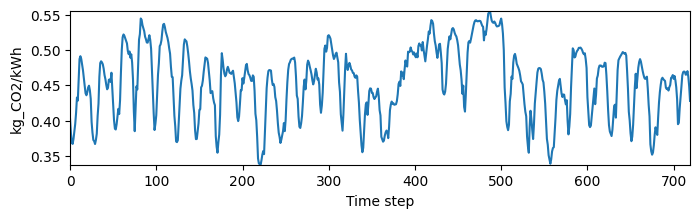

In [61]:
'''Plot carbon intensity data'''
fig, ax = plt.subplots(1, 1, figsize=(8, 2))
x = carbon_intensity_data.index
y = carbon_intensity_data['carbon_intensity']
ax.plot(x, y)
ax.set_xlabel('Time step')
ax.set_ylabel('kg_CO2/kWh')
plt.show()

In [62]:
'''Randomly select period of simulation'''
def select_simulation_period(
    dataset_name: str, count: int, seed: int, simulation_periods_to_exclude: List[Tuple[int, int]] = None) -> Tuple[int, int]:
    """Randomly select environment simulation start and end time steps
    that cover a specified number of days.

    Parameters
    ----------
    dataset_name: str
        CityLearn dataset to query buildings from.
    count: int
        Number of simulation days.
    seed: int
        Seed for pseudo-random number generator.
    simulation_periods_to_exclude: list[tuple[int, int]]
        List of simulation periods to exclude from selection pool.

    Returns
    -------
    simulation_start_time_step: int
        The first time step in schema time series files to
        be read when constructing the environment.
    simulation_end_time_step: int
        The last time step in schema time series files to
        be read when constructing the environment.
    """

    assert 1 <= count <= 365, 'count must be between 1 and 365.'

    # set random seed
    np.random.seed(seed)

    # use any of the files to determine the total
    # number of available time steps
    schema = DataSet.get_schema(dataset_name)
    filename = schema['buildings'][selected_building]['carbon_intensity']
    filepath = os.path.join(root_directory, filename)
    time_steps = pd.read_csv(filepath).shape[0]

    # set candidate simulation start time steps
    # spaced by the number of specified days
    simulation_start_time_step_list = np.arange(0, time_steps, 24*count)

    # exclude period if needed
    if simulation_periods_to_exclude is not None:
        simulation_start_time_step_list_to_exclude = \
            [s for s, e in simulation_periods_to_exclude]
        simulation_start_time_step_list = np.setdiff1d(
            simulation_start_time_step_list,
            simulation_start_time_step_list_to_exclude
        )

    else:
        pass

    # randomly select a simulation start time step
    simulation_start_time_step = np.random.choice(
        simulation_start_time_step_list, size=1
    )[0]
    simulation_end_time_step = simulation_start_time_step + 24*count - 1

    return simulation_start_time_step, simulation_end_time_step

In [63]:
'''Pick building for simulation'''
def select_buildings(
dataset_name: str, count: int, seed: int, buildings_to_exclude = None,
):
    """Randomly select buildings from CityLearn dataset.

    Parameters
    ----------
    dataset_name: str
        CityLearn dataset to query buildings from.
    count: int
        Number of buildings to set as active in schema.
    seed: int
        Seed for pseudo-random number generator
    buildings_to_exclude: list[str]
        List of buildings to exclude from selection pool.

    Returns
    -------
    buildings: list[str]
        List of selected building names.
    """

    assert 1 <= count <= 15, 'count must be between 1 and 15.'

    # set random seed
    np.random.seed(seed)

    # get all building names
    schema = DataSet.get_schema(dataset_name)
    buildings = list(schema['buildings'].keys())

    # remove buildings 12 and 15 as they have pecularities in their data
    # that are not relevant to this tutorial
    # buildings_to_exclude = [] 
    # buildings_to_exclude += ['Building_12', 'Building_15']

    # for b in buildings_to_exclude:
    #     buildings.remove(b)

    # randomly select specified number of buildings
    buildings = np.random.choice(buildings, size=count, replace=False).tolist()

    # reorder buildings
    building_ids = [int(b.split('_')[-1]) for b in buildings]
    building_ids = sorted(building_ids)
    buildings = [f'Building_{i}' for i in building_ids]

    return buildings

# selected_building = "Building_2"

random_seed = 77
# USER_BUILDING_COUNT = 1
# selected_building = select_buildings(
#     DATASET_NAME,
#     USER_BUILDING_COUNT,
#     random_seed,
# )
# print(selected_building)

In [64]:
'''Pick simulation time steps'''
simulation_start, simulation_end = select_simulation_period(DATASET_NAME, 14, random_seed)
simulation_start

0

In [65]:
'''Pick observations and agent'''
active_observations = ["hour", "indoor_dry_bulb_temperature", "electricity_pricing", "indoor_dry_bulb_temperature_delta", "non_shiftable_load"]
CENTRAL_AGENT = True

## Graph functions


The first function helps us calculate and return the KPIs in a table:

In [66]:
def get_kpis(env: CityLearnEnv) -> pd.DataFrame:
    """Returns evaluation KPIs.

    Electricity cost and carbon emissions KPIs are provided
    at the building-level and average district-level. Average daily peak,
    ramping and (1 - load factor) KPIs are provided at the district level.

    Parameters
    ----------
    env: CityLearnEnv
        CityLearn environment instance.

    Returns
    -------
    kpis: pd.DataFrame
        KPI table.
    """

    kpis = env.unwrapped.evaluate(comfort_band=1)

    # names of KPIs to retrieve from evaluate function
    kpi_names = {
        'cost_total': 'Cost',
        'carbon_emissions_total': 'Emissions',
        'discomfort_proportion': 'Discomfort total',
        'discomfort_cold_proportion': 'Cold discomfort proportion',
        'discomfort_hot_proportion': 'Hot discomfort proportion',
        'daily_peak_average': 'Avg. daily peak',
        'ramping_average': 'Ramping',
        'monthly_one_minus_load_factor_average': '1 - load factor',
        
    }


    kpis = kpis[
        (kpis['cost_function'].isin(kpi_names))
    ].dropna()
    kpis['cost_function'] = kpis['cost_function'].map(lambda x: kpi_names[x])

    # round up the values to 2 decimal places for readability
    kpis['value'] = kpis['value'].round(2)

    # rename the column that defines the KPIs
    kpis = kpis.rename(columns={'cost_function': 'kpi'})


    return kpis

The next function, plot_building_kpis plots the KPIs at the building level in bar charts and can be used to compare different control strategies by providing it with a dictionary that maps a control agent name to the environment the agent acted on:

In [67]:
def plot_building_kpis(envs) -> plt.Figure:
    """Plots electricity consumption, cost and carbon emissions
    at the building-level for different control agents in bar charts.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='building'].copy()
        kpis['building_id'] = kpis['name'].str.split('_', expand=True)[1]
        kpis['building_id'] = kpis['building_id'].astype(int).astype(str)
        kpis['env_id'] = k
        kpis_list.append(kpis)

    print(kpis_list)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    kpi_names= kpis['kpi'].unique()
    column_count_limit = 2
    row_count = math.ceil(len(kpi_names)/column_count_limit)
    column_count = min(column_count_limit, len(kpi_names))
    building_count = len(kpis['name'].unique())
    env_count = len(envs)
    figsize = (3.5*column_count, 1*env_count*building_count*row_count)
    fig, _ = plt.subplots(
        row_count, column_count, figsize=figsize, sharey=True,
        gridspec_kw={'hspace': 3.5}


    )

    for i, (ax, (k, k_data)) in enumerate(zip(fig.axes, kpis.groupby('kpi'))):
        sns.barplot(x='value', y='name', data=k_data, hue='env_id', ax=ax)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_title(k, verticalalignment =  'baseline')

        for j, _ in enumerate(envs):
            ax.bar_label(ax.containers[j], fmt='%.2f')

        if i == len(kpi_names) - 1:
           ax.legend(
            loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0
        )
        else:
            ax.legend().set_visible(False)

        for s in ['right','top']:
            ax.spines[s].set_visible(False)

    return fig

The plot_building_load_profiles function plots the building-level net electricity consumption profiles for the baseline (no battery) and control scenario with battery. It can also be used to compare different control agents:

In [68]:
def plot_building_load_profiles(
    envs, daily_average: bool = None
) -> plt.Figure:
    """Plots building-level net electricty consumption profile
    for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    daily_average: bool, default: False
        Whether to plot the daily average load profile.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    daily_average = False if daily_average is None else daily_average
    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (8.0*column_count, 3*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = v.unwrapped.buildings[i].net_electricity_consumption
            y = np.reshape(y, (-1, 24)).mean(axis=0) if daily_average else y
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_ylabel('kWh')

        if daily_average:
            ax.set_xlabel('Hour')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

        else:
            ax.set_xlabel('Time step')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig


The plot_battery_soc_profiles function plots the building-level battery state of charge (SoC) profiles can also be used to compare different control agents:

In [69]:
def plot_battery_soc_profiles(envs) -> plt.Figure:
    """Plots building-level battery SoC profiles fro different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (8.0*column_count, 3*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = np.array(v.unwrapped.buildings[i].electrical_storage.soc)
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('SoC')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
        ax.set_ylim(0.0, 1.0)

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig

In [70]:
def plot_simulation_summary(envs):
    """Plots KPIs, load and battery SoC profiles for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    """

    print('#'*8 + ' BUILDING-LEVEL ' + '#'*8)
    print('Building-level KPIs:')
    _ = plot_building_kpis(envs)
    plt.show()

    print('Building-level simulation period load profiles:')
    _ = plot_building_load_profiles(envs)
    plt.show()

    print('Building-level daily-average load profiles:')
    _ = plot_building_load_profiles(envs, daily_average=True)
    plt.show()

    print('Battery SoC profiles:')
    _ = plot_battery_soc_profiles(envs)
    plt.show()



## Initialize CityLearn environment

### Baseline Agent

In [71]:
baseline_env = CityLearnEnv(
    "citylearn_challenge_2023_phase_1",
    central_agent=CENTRAL_AGENT,
    buildings=selected_building,
    active_observations=active_observations,
    simulation_start_time_step=simulation_start,
    simulation_end_time_step=simulation_end,
)

baseline_model = BaselineAgent(baseline_env)

# always start by reseting the environment
observations, _ = baseline_env.reset()

# step through the environment until terminal
# state is reached i.e., the control episode ends
while not baseline_env.terminated:
    # select actions from the model
    actions = baseline_model.predict(observations)

    # apply selected actions to the environment
    observations, _, _, _, _ = baseline_env.step(actions)

######## BUILDING-LEVEL ########
Building-level KPIs:
[                           kpi  value        name     level building_id  \
23                   Emissions   1.00  Building_1  building           1   
24                        Cost   1.00  Building_1  building           1   
25            Discomfort total   0.59  Building_1  building           1   
26  Cold discomfort proportion   0.58  Building_1  building           1   
27   Hot discomfort proportion   0.01  Building_1  building           1   

      env_id  
23  Baseline  
24  Baseline  
25  Baseline  
26  Baseline  
27  Baseline  ]


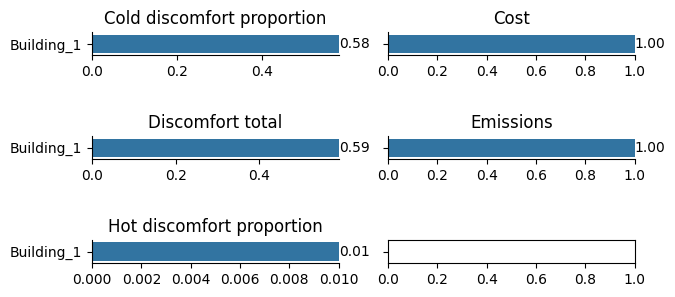

Building-level simulation period load profiles:


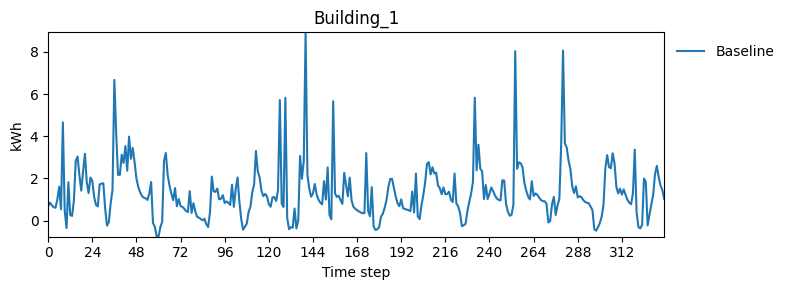

Building-level daily-average load profiles:


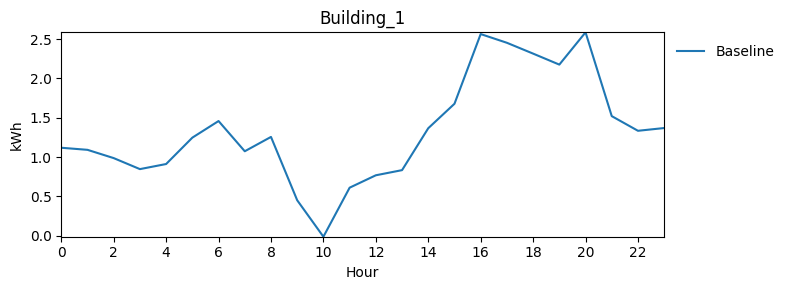

Battery SoC profiles:


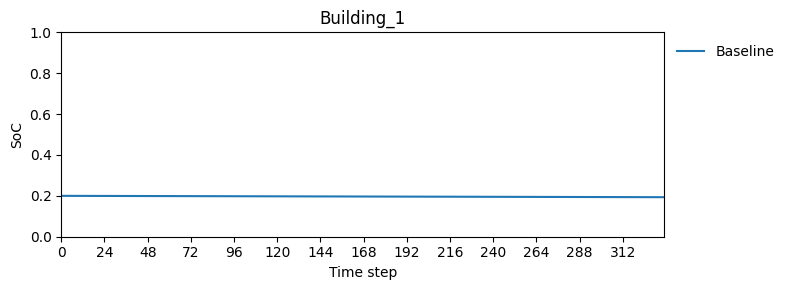

In [72]:
plot_simulation_summary({
    'Baseline': baseline_env,
})

In [73]:
"""Initialize Soft Actor Critic Model"""
sac_env = CityLearnEnv(
    schema = "/home/wepea2/capstone/sinergym/drl_scripts/new_schema.json",
    central_agent=CENTRAL_AGENT,
    buildings=selected_building,
    active_observations=active_observations,
    simulation_start_time_step=simulation_start,
    simulation_end_time_step=simulation_end,
    
)

sac_env = StableBaselines3Wrapper(sac_env)

sac_model = SAC(policy='MlpPolicy', env=sac_env, seed=random_seed)

In [74]:
"""Begin training"""
sac_episodes = 2
sac_episode_timesteps = sac_env.unwrapped.time_steps - 1
sac_total_timesteps = sac_episodes*sac_episode_timesteps

# ------------------------------- TRAIN MODEL -----------------------------
for i in tqdm(range(sac_episodes)):
    sac_model = sac_model.learn(
        total_timesteps=sac_episode_timesteps,
        reset_num_timesteps=False,
    )

100%|██████████| 2/2 [00:20<00:00, 10.47s/it]


Get the actions at each timestep that the model has settled on as optimal and compare to other control methods

######## BUILDING-LEVEL ########
Building-level KPIs:
[                           kpi  value        name     level building_id  \
23                   Emissions   1.00  Building_1  building           1   
24                        Cost   1.00  Building_1  building           1   
25            Discomfort total   0.59  Building_1  building           1   
26  Cold discomfort proportion   0.58  Building_1  building           1   
27   Hot discomfort proportion   0.01  Building_1  building           1   

      env_id  
23  Baseline  
24  Baseline  
25  Baseline  
26  Baseline  
27  Baseline  ,                            kpi  value        name     level building_id env_id
23                   Emissions   1.58  Building_1  building           1  SAC-1
24                        Cost   1.53  Building_1  building           1  SAC-1
25            Discomfort total   0.95  Building_1  building           1  SAC-1
26  Cold discomfort proportion   0.95  Building_1  building           1  SAC-1
27   Hot

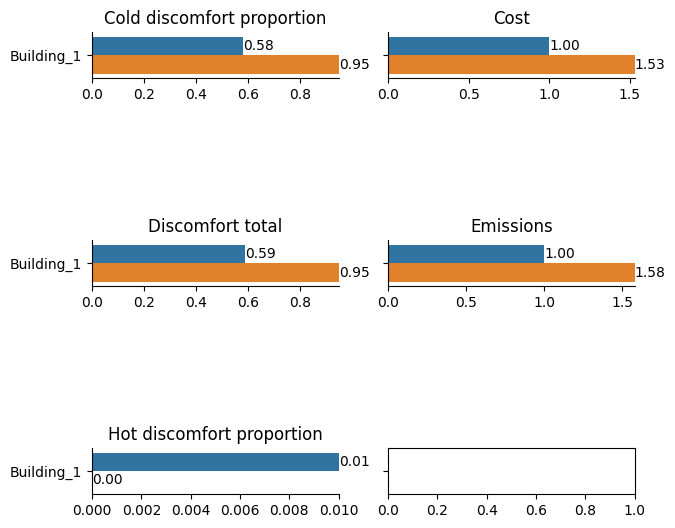

Building-level simulation period load profiles:


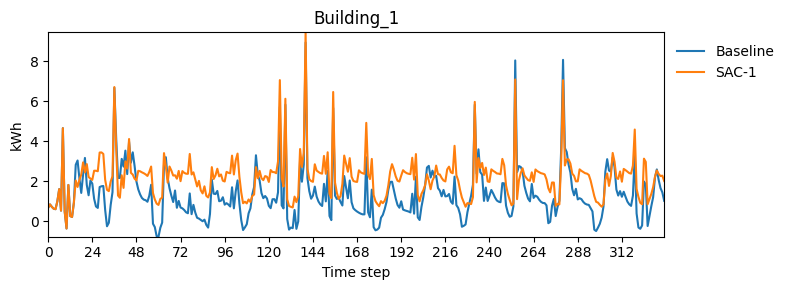

Building-level daily-average load profiles:


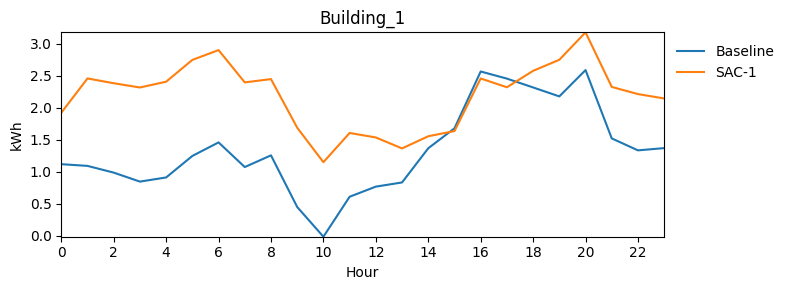

Battery SoC profiles:


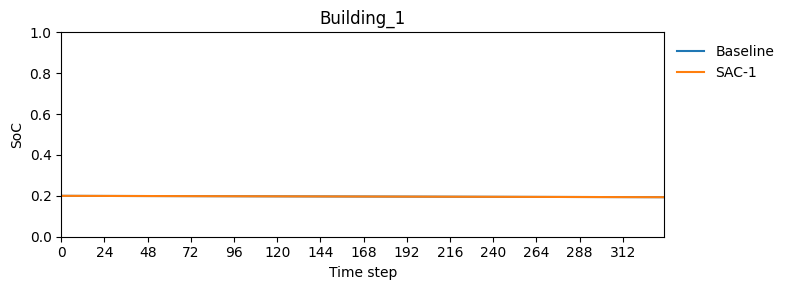

[array([-0.2402075 ,  0.53006595], dtype=float32), array([-0.22510278,  0.53044283], dtype=float32), array([-0.21485144,  0.5313046 ], dtype=float32), array([-0.20350546,  0.53248626], dtype=float32), array([-0.19063467,  0.530066  ], dtype=float32), array([-0.17303056,  0.5218944 ], dtype=float32), array([-0.15914524,  0.5133955 ], dtype=float32), array([-0.1494025 ,  0.50518477], dtype=float32), array([-0.1459949 ,  0.49824384], dtype=float32), array([-0.14513004,  0.49121866], dtype=float32), array([-0.15065813,  0.48722988], dtype=float32), array([-0.1492157 ,  0.47873545], dtype=float32), array([-0.15328759,  0.46837395], dtype=float32), array([-0.1547792 ,  0.45977682], dtype=float32), array([-0.15497762,  0.4569393 ], dtype=float32), array([-0.15696704,  0.4592551 ], dtype=float32), array([-0.13248491,  0.46049756], dtype=float32), array([-0.12440515,  0.45537552], dtype=float32), array([-0.10056168,  0.45448896], dtype=float32), array([-0.0876739 ,  0.46588853], dtype=float32),

In [75]:
observations, _ = sac_env.reset()
sac_actions_list = []

while not sac_env.unwrapped.terminated:
    actions, _ = sac_model.predict(observations, deterministic=True)
    observations, _, _, _, _ = sac_env.step(actions)
    sac_actions_list.append(actions)

# plot summary and compare with other control results
plot_simulation_summary({
    'Baseline': baseline_env,
    'SAC-1': sac_env
})

print(sac_actions_list)

Plot SAC rewards

In [76]:
def plot_rewards(ax: plt.Axes, rewards, title: str) -> plt.Axes:
    """Plots rewards over training episodes.

    Parameters
    ----------
    rewards: list[float]
        List of reward sum per episode.
    title: str
        Plot axes title

    Returns
    -------
    ax: plt.Axes
        Plotted axes
    """

    ax.plot(rewards)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    ax.set_title(title)

    return ax

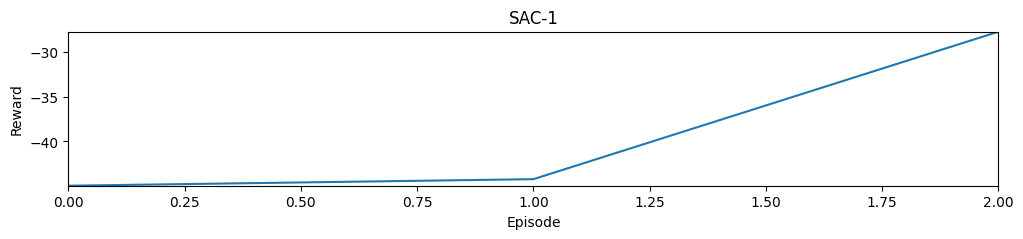

In [77]:
envs = {
    'SAC-1': pd.DataFrame(sac_env.unwrapped.episode_rewards)['sum'].tolist(),
}
fig, axs = plt.subplots(1, 1, figsize=(12, 2))

for ax, (k, v) in zip(fig.axes, envs.items()):
    ax = plot_rewards(ax, v, k)

plt.show()

In [78]:
def plot_actions(actions_list, selected_buildings, title: str) -> plt.Figure:
    """Plots action time series for different buildings

    Parameters
    ----------
    actions_list: list[list[float]]
        List of actions where each element with index, i,
        in list is a list of the actions for different buildings
        taken at time step i.
    selected_buildings: list[str]:
        List of build names that map to the action lists.
    title: str
        Plot axes title

    Returns
    -------
    fig: plt.Figure
        Figure with plotted axes

    """

    fig, ax = plt.subplots(1, 1, figsize=(6, 1))
    plot_data = pd.DataFrame(actions_list, columns=selected_buildings)
    x = list(range(plot_data.shape[0]))

    for c in plot_data.columns:
        y = plot_data[c].tolist()
        ax.plot(x, y, label=c)

    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)
    ax.set_xlabel('Time step')
    ax.set_ylabel(r'$\frac{kWh}{kWh_{capacity}}$')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax.set_title(title)

    return fig





Show SAC agent actions

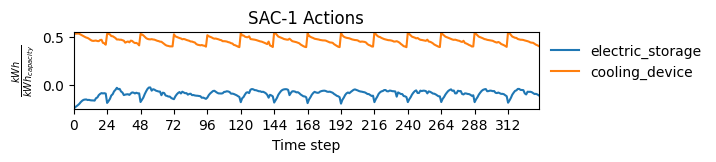

In [79]:
#Write script to get active actions from schema
fig = plot_actions(sac_actions_list, ['electric_storage', 'cooling_device'], 'SAC-1 Actions')
# ax = fig.gca()  # Get the current axes
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax.set_ylim(-0.5, -0.05)
plt.show()

In [80]:
print(sac_actions_list)

[array([-0.2402075 ,  0.53006595], dtype=float32), array([-0.22510278,  0.53044283], dtype=float32), array([-0.21485144,  0.5313046 ], dtype=float32), array([-0.20350546,  0.53248626], dtype=float32), array([-0.19063467,  0.530066  ], dtype=float32), array([-0.17303056,  0.5218944 ], dtype=float32), array([-0.15914524,  0.5133955 ], dtype=float32), array([-0.1494025 ,  0.50518477], dtype=float32), array([-0.1459949 ,  0.49824384], dtype=float32), array([-0.14513004,  0.49121866], dtype=float32), array([-0.15065813,  0.48722988], dtype=float32), array([-0.1492157 ,  0.47873545], dtype=float32), array([-0.15328759,  0.46837395], dtype=float32), array([-0.1547792 ,  0.45977682], dtype=float32), array([-0.15497762,  0.4569393 ], dtype=float32), array([-0.15696704,  0.4592551 ], dtype=float32), array([-0.13248491,  0.46049756], dtype=float32), array([-0.12440515,  0.45537552], dtype=float32), array([-0.10056168,  0.45448896], dtype=float32), array([-0.0876739 ,  0.46588853], dtype=float32),

## Reward Tweaks

In [83]:
class CustomReward(RewardFunction):
    def __init__(self, env_metadata):
        super().__init__(env_metadata)

    def calculate(self, observations):
        reward_list = []

        for o, m in zip(observations, self.env_metadata['buildings']):
            cost = o['net_electricity_consumption'] * o['electricity_pricing']
            battery_soc = o['electrical_storage_soc']
            penalty = -(1.0 + np.sign(cost) * battery_soc)
            reward = penalty * abs(cost)
            reward_list.append(reward)

        reward = [sum(reward_list)]
        return reward


In [84]:
"""Initialize CUSTOM REWARD Soft Actor Critic Model """
sacr_env = CityLearnEnv(
    schema = "/home/wepea2/capstone/sinergym/drl_scripts/new_schema.json",
    central_agent=CENTRAL_AGENT,
    buildings=selected_building,
    active_observations=active_observations,
    simulation_start_time_step=simulation_start,
    simulation_end_time_step=simulation_end,
    reward_function=CustomReward
    
)

sacr_env = StableBaselines3Wrapper(sacr_env)

sacr_model = SAC(policy='MlpPolicy', env=sacr_env, seed=random_seed)

In [85]:
"""Begin training"""
sacr_episodes = 2
sacr_episode_timesteps = sacr_env.unwrapped.time_steps - 1
sacr_total_timesteps = sacr_episodes*sacr_episode_timesteps

# ------------------------------- TRAIN MODEL -----------------------------
for i in tqdm(range(sacr_episodes)):
    sacr_model = sacr_model.learn(
        total_timesteps=sacr_episode_timesteps,
        reset_num_timesteps=False,
    )

100%|██████████| 2/2 [00:29<00:00, 14.50s/it]


######## BUILDING-LEVEL ########
Building-level KPIs:
[                           kpi  value        name     level building_id  \
23                   Emissions   1.00  Building_1  building           1   
24                        Cost   1.00  Building_1  building           1   
25            Discomfort total   0.59  Building_1  building           1   
26  Cold discomfort proportion   0.58  Building_1  building           1   
27   Hot discomfort proportion   0.01  Building_1  building           1   

      env_id  
23  Baseline  
24  Baseline  
25  Baseline  
26  Baseline  
27  Baseline  ,                            kpi  value        name     level building_id env_id
23                   Emissions   1.58  Building_1  building           1  SAC-1
24                        Cost   1.53  Building_1  building           1  SAC-1
25            Discomfort total   0.95  Building_1  building           1  SAC-1
26  Cold discomfort proportion   0.95  Building_1  building           1  SAC-1
27   Hot

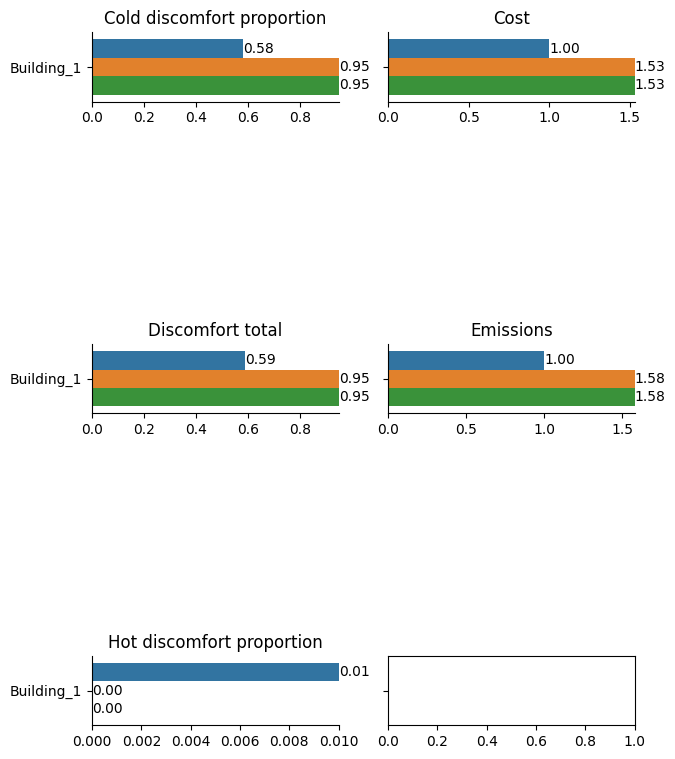

Building-level simulation period load profiles:


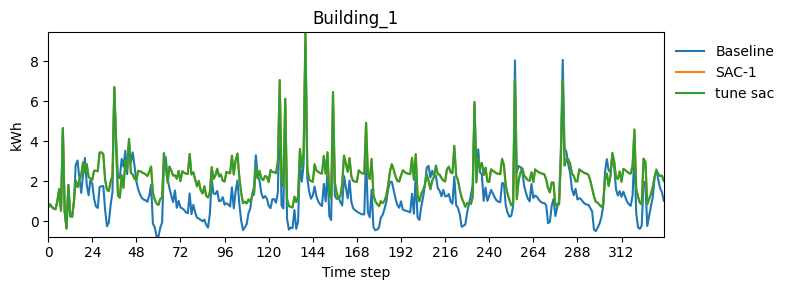

Building-level daily-average load profiles:


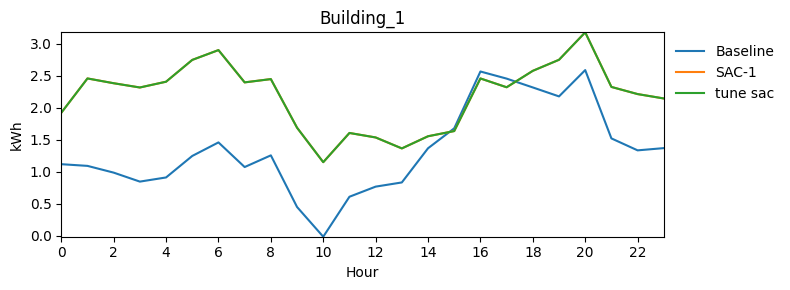

Battery SoC profiles:


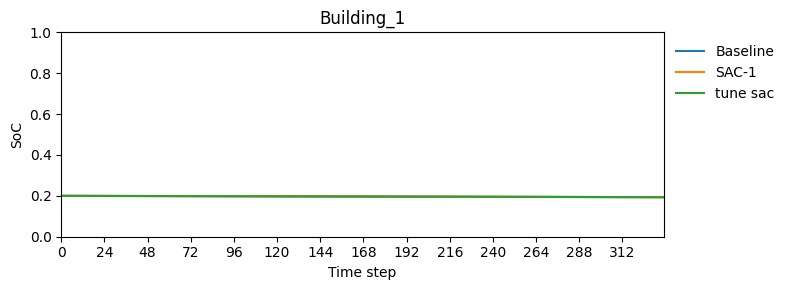

[array([-0.2402075 ,  0.53006595], dtype=float32), array([-0.22510278,  0.53044283], dtype=float32), array([-0.21485144,  0.5313046 ], dtype=float32), array([-0.20350546,  0.53248626], dtype=float32), array([-0.19063467,  0.530066  ], dtype=float32), array([-0.17303056,  0.5218944 ], dtype=float32), array([-0.15914524,  0.5133955 ], dtype=float32), array([-0.1494025 ,  0.50518477], dtype=float32), array([-0.1459949 ,  0.49824384], dtype=float32), array([-0.14513004,  0.49121866], dtype=float32), array([-0.15065813,  0.48722988], dtype=float32), array([-0.1492157 ,  0.47873545], dtype=float32), array([-0.15328759,  0.46837395], dtype=float32), array([-0.1547792 ,  0.45977682], dtype=float32), array([-0.15497762,  0.4569393 ], dtype=float32), array([-0.15696704,  0.4592551 ], dtype=float32), array([-0.13248491,  0.46049756], dtype=float32), array([-0.12440515,  0.45537552], dtype=float32), array([-0.10056168,  0.45448896], dtype=float32), array([-0.0876739 ,  0.46588853], dtype=float32),

In [86]:
observations, _ = sacr_env.reset()
sacr_actions_list = []

while not sacr_env.unwrapped.terminated:
    actions, _ = sacr_model.predict(observations, deterministic=True)
    observations, _, _, _, _ = sacr_env.step(actions)
    sacr_actions_list.append(actions)

# plot summary and compare with other control results
plot_simulation_summary({
    'Baseline': baseline_env,
    'SAC-1': sac_env,
    "tune sac": sacr_env
})

print(sacr_actions_list)

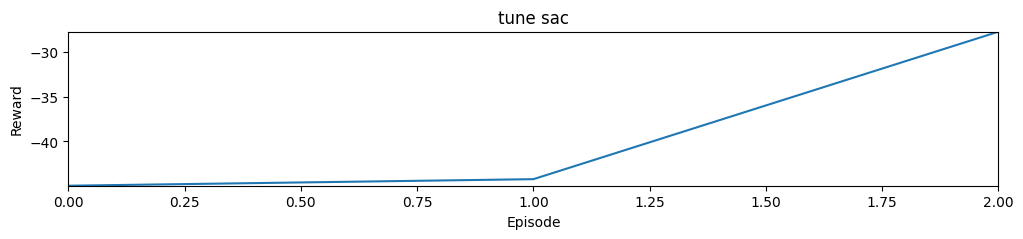

In [87]:
envs = {
    'tune sac': pd.DataFrame(sacr_env.unwrapped.episode_rewards)['sum'].tolist(),
}
fig, axs = plt.subplots(1, 1, figsize=(12, 2))

for ax, (k, v) in zip(fig.axes, envs.items()):
    ax = plot_rewards(ax, v, k)

plt.show()

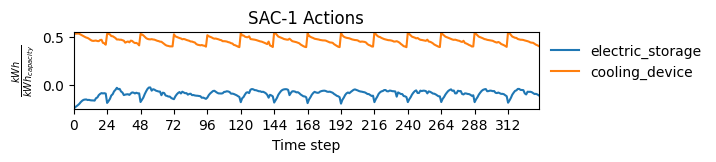

In [88]:
fig = plot_actions(sacr_actions_list, ['electric_storage', 'cooling_device'], 'SAC-1 Actions')
# ax = fig.gca()  # Get the current axes
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
# ax.set_ylim(-0.5, -0.05)
plt.show()